In [1]:
pip install opencv-python   # Installs OpenCV's main package for image processing

In [2]:
# Imports OpenCV for image processing
import cv2
# Imports NumPy for numerical operations and handling image arrays
import numpy as np

In [3]:
 # Reads the image in color mode (1), loading it as a NumPy array
im = cv2.imread('/content/pexels-chevanon-1108099.jpg',1)

In [4]:
im.shape

(3888, 5184, 3)

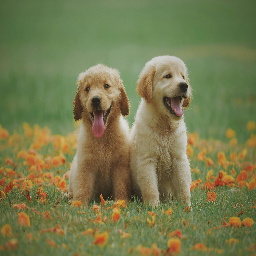

In [5]:
# Imports function to display images in Google Colab
from google.colab.patches import cv2_imshow

# Resizes the image to 256x256 pixels
im=cv2.resize(im,(256,256))

# Displays the image in Colab
cv2_imshow(im)

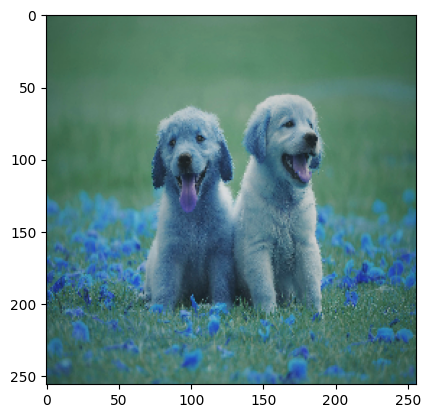

In [6]:
# Imports Matplotlib for image visualization
import matplotlib.pyplot as plt
# Displays the image using Matplotlib
plt.imshow(im)

In [7]:
# Prints the NumPy array representing the image
print(im)

[[[ 56  95  74]
  [ 56  95  74]
  [ 58  97  76]
  ...
  [ 55  94  73]
  [ 54  93  72]
  [ 56  94  72]]

 [[ 56  95  74]
  [ 58  97  75]
  [ 56  95  74]
  ...
  [ 55  94  73]
  [ 54  93  72]
  [ 54  93  72]]

 [[ 57  96  74]
  [ 57  96  74]
  [ 57  96  74]
  ...
  [ 56  95  74]
  [ 56  95  74]
  [ 54  93  72]]

 ...

 [[ 52  85  71]
  [ 45  79  72]
  [ 44  78  72]
  ...
  [ 47  94  84]
  [ 48  94  95]
  [ 51  96  98]]

 [[ 52  84  73]
  [ 50  79  70]
  [ 44  78  72]
  ...
  [ 42  89 103]
  [ 46  94 106]
  [ 50  97 111]]

 [[ 51  85  78]
  [ 46  80  70]
  [ 45  78  71]
  ...
  [ 40  86 110]
  [ 44  91 113]
  [ 47  94 121]]]


# Gaussian Noise

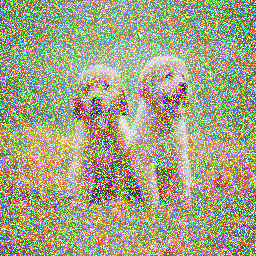

In [8]:
# Mean of the Gaussian noise
mean = 0
# Standard deviation (controls noise intensity)
sigma = 2
# Generates Gaussian noise
noise = np.random.normal(mean,sigma,im.shape).astype(np.uint8)
# Adds noise to the image
noisy_im = cv2.add(im, noise)
# Displays the noisy image
cv2_imshow(noisy_im)

# Salt and Pepper Noise

In [9]:
# Probability of salt and pepper noise
salt_prob = pepper_prob = 0.01
# Create a copy of the original image
noisy_im1 = np.copy(im)
# Total number of pixels (height × width × channels)
total_pixels = im.size
# Number of white (salt) pixels to add
num_salt = int(salt_prob * total_pixels)
# Number of black (pepper) pixels to add
num_pepper = int(pepper_prob * total_pixels)

In [10]:
# Generate random coordinates for salt noise
coords = [np.random.randint(0, i-1, num_salt) for i in im.shape[:2]]
# Set selected pixels to white (salt noise)
noisy_im1[coords[0], coords[1]] = 255

In [11]:
# Generate random coordinates for pepper noise
coords = [np.random.randint(0, i-1, num_pepper) for i in im.shape[:2]]
# Set selected pixels to black (pepper noise)
noisy_im1[coords[0], coords[1]] = 0

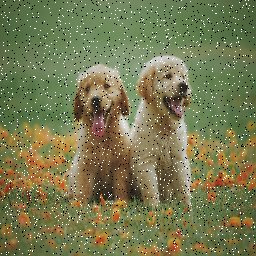

In [12]:
# Displays the noisy image in Google Colab
cv2_imshow(noisy_im1)

# Blur Filter

In [13]:
# Applies a 3x3 average blur filter to the noisy image
im1 = cv2.blur(noisy_im,(3,3))
# Applies a 3x3 average blur filter to the salt-and-pepper noisy image
im2 = cv2.blur(noisy_im1,(3,3))

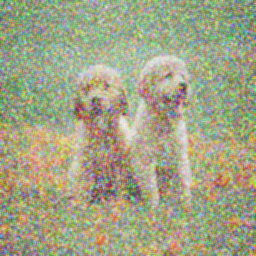

In [14]:
# Displays the blurred image after applying a 3x3 average blur
cv2_imshow(im1)

In [15]:
# Computes the sum of pixel differences between the two blurred images
np.sum(im1 - im2)

9626778

In [16]:
# Computes pixel-wise difference between the two blurred images
dif=(im1-im2)

In [17]:
np.sum(im-im1)

40069258

In [18]:
np.sum(im-im2)

22077988

In [19]:
# Applies a 3x3 Gaussian blur to the Gaussian noisy image
im3 = cv2.GaussianBlur(noisy_im,(3,3),0)
# Applies a 3x3 Gaussian blur to the salt-and-pepper noisy image
im4 = cv2.GaussianBlur(noisy_im1,(3,3),0)

In [20]:
# Computes the sum of pixel differences between the original and Gaussian-blurred image
np.sum(im-im3)

40115837

In [21]:
# Computes the sum of pixel differences between the original and Gaussian-blurred salt-and-pepper noisy image
np.sum(im-im4)

21498191